In [ ]:
# %pip install numpy
# %pip install pandas
# %pip install scipy
# %pip install seaborn
# %pip install matplotlib
# %pip install stat/smodels
# %pip install pingouin
# %pip install openpyxl

In [1]:
# 整理数据的库
import numpy as np
import pandas as pd
# 数据可视化的库
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
# 数据分析的库
from scipy import stats
import scipy.stats as stats
import statsmodels.formula.api as smf # 回归分析
from scipy.stats import chi2_contingency #卡方检验
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd #事后检验
# 其它
import warnings
warnings.filterwarnings('ignore') #忽视警告


In [3]:
# 读取数据
df = pd.read_excel(r"D:\work\github\py_for_stats\esl-survey\esl.xlsx")

# 数据清洗

In [4]:
# 定义函数方法:将数字和数字和代表含义一一映射

# usage：1为"是"，其余为"否"
def usage(series):
    if series == 1:
        return "是"
    else:
        return "否"


# select：1为"选中"，其余为"未选中"
def select(series):
    if series == 1:
        return "选中"
    else:
        return "未选中"


# cet：1为"通过了"，2为"未通过"
def cet(series):
    if series == 1:
        return "通过了"
    else:
        return "未通过"


# gender变量：1为男性，2为女性
def gender(series):
    if series == 1:
        return "男性"
    else:
        return "女性"


# hukou变量：1为城镇，2为非城镇
def hukou(series):
    if series == 1:
        return "城镇类"
    else:
        return "非城镇类"


# grade变量：1-4为大一~大四
def grade(series):
    if series == 1:
        return "大一"
    elif series == 2:
        return "大二"
    elif series == 3:
        return "大三"
    else:
        return "大四"


# major_type变量：1为'人文社科类'，2为'理工医类'
def major_type(series):
    if series == 1:
        return "人文社科类"
    else:
        return "理工医类"


# school变量：1=商学院,2=电子与计算机工程学院,3=文学与传媒学院,4=护理与健康学院,5=艺术设计与创意产业系,6=会计学院,7=外国语学院,8=云康医学与健康学院,9=公共管理学院,10=音乐系，
def school(series):
    if series == 1:
        return "商学院"
    elif series == 2:
        return "电子与计算机工程学院"
    elif series == 3:
        return "文学与传媒学院"
    elif series == 4:
        return "护理与健康学院"
    elif series == 5:
        return "艺术设计与创意产业系"
    elif series == 6:
        return "会计学院"
    elif series == 7:
        return "外国语学院"
    elif series == 8:
        return "云康医学与健康学院"
    elif series == 9:
        return "公共管理学院"
    elif series == 10:
        return "音乐系"


# major变量：1=英语系,2=日语系,3=法语系,4=汉语国际教育系
def major(series):
    if series == 1:
        return "英语系"
    elif series == 2:
        return "日语系"
    elif series == 3:
        return "法语系"
    elif series == 4:
        return "汉语国际教育系"



In [5]:
# 将相应的变量转为“类别型变量”
df.usage = df.usage.apply(usage).astype("category")
df.cet4 = df.cet4.apply(cet).astype("category")
df.cet6 = df.cet6.apply(cet).astype("category")
df.gender = df.gender.apply(gender).astype("category")
df.hukou = df.hukou.apply(hukou).astype("category")
df.grade = df.grade.apply(grade).astype("category")
df.major_type = df.major_type.apply(major_type).astype("category")
df.grade = df.grade.apply(grade).astype("category")
df.school = df.school.apply(school).astype("category")
df.major = df.major.apply(major).astype("category")



In [6]:
# 看一下每一个变量对应的是第几个变量（变量名前的数字为其顺序）
for i in range(len(df.columns)):
    print(i,df.columns[i])

0 usage
1 platform_bilibili
2 platform_icourse
3 platform_tencent
4 platform_other
5 cet4
6 cet6
7 gaokao
8 digital_skill
9 study_grammar
10 study_vocabulary
11 study_listening
12 study_speaking
13 study_writing
14 study_translation
15 study_reading
16 behav_1
17 behav_2
18 behav_3
19 behav_4
20 behav_5
21 behav_6
22 cogn_1
23 cogn_2
24 cogn_3
25 cogn_4
26 cogn_5
27 cogn_6
28 emo_1
29 emo_2
30 emo_3
31 emo_4
32 soc_1
33 soc_2
34 soc_3
35 gender
36 hukou
37 grade
38 major_type
39 school
40 major


In [7]:
# 将以“platform_”开头的变量（第1~5列的变量）转为“类别型变量”
for i in range(1, 5):
    df.iloc[:, i] = df.iloc[:, i].apply(select).astype("category")



In [8]:
# 检查一下结果
df.filter(regex = "^platform_.*").head(5)

,platform_bilibili,platform_icourse,platform_tencent,platform_other
0,未选中,未选中,未选中,未选中
1,选中,选中,选中,未选中
2,未选中,未选中,未选中,未选中
3,未选中,未选中,未选中,未选中
4,未选中,未选中,未选中,未选中


# 反向编码

In [9]:
# 第10题的第四小题是反向题，我们需要将数据的编码顺序进行反转。
# 先看一下数据的形态
df.emo_4.head(10)

0    NaN
1    4.0
2    NaN
3    NaN
4    NaN
5    6.0
6    NaN
7    NaN
8    5.0
9    3.0
Name: emo_4, dtype: float64

In [10]:
#通过列表的方式将编码形式进行转换
before = [1,2,3,4,5,6]
after = [6,5,4,3,2,1]

df["emo_4_recode"] = df["emo_4"].replace(before,after)

In [11]:
#查看反向编码之后的结果
df.emo_4_recode.head(10)

0    NaN
1    3.0
2    NaN
3    NaN
4    NaN
5    1.0
6    NaN
7    NaN
8    2.0
9    4.0
Name: emo_4_recode, dtype: float64

# 数据计算

In [12]:
#计算behav,cogn,emo,soc这四个变量

In [21]:
df["behav"] = (
    df.behav_1
    + df.behav_2
    + df.behav_3
    + df.behav_4
    + df.behav_5
    + df.behav_6
) / 6
df["cogn"] = (
    df.cogn_1
    + df.cogn_2
    + df.cogn_3
    + df.cogn_4
    + df.cogn_5
    + df.cogn_6
) / 6
df["emo"] = (
    df.emo_1 + df.emo_2 + df.emo_3 + df.emo_4_recode   #注意这里用反转后的题目
) / 4
df["soc"] = (df.soc_1 + df.soc_2 + df.soc_3) / 3



In [13]:
#检查一下数据
df.head(5)

,usage,platform_bilibili,platform_icourse,platform_tencent,platform_other,cet4,cet6,gaokao,digital_skill,study_grammar,...,soc_1,soc_2,soc_3,gender,hukou,grade,major_type,school,major,emo_4_recode
0,否,未选中,未选中,未选中,未选中,通过了,未通过,2,4,NaN,...,NaN,NaN,NaN,女性,非城镇类,大四,人文社科类,文学与传媒学院,NaN,NaN
1,是,选中,选中,选中,未选中,未通过,未通过,4,4,2.0,...,4.0,5.0,4.0,男性,城镇类,大四,人文社科类,文学与传媒学院,NaN,3.0
2,否,未选中,未选中,未选中,未选中,通过了,未通过,3,5,NaN,...,NaN,NaN,NaN,女性,城镇类,大四,人文社科类,文学与传媒学院,NaN,NaN
3,否,未选中,未选中,未选中,未选中,未通过,未通过,2,5,NaN,...,NaN,NaN,NaN,女性,城镇类,大四,人文社科类,文学与传媒学院,NaN,NaN
4,否,未选中,未选中,未选中,未选中,未通过,未通过,2,5,NaN,...,NaN,NaN,NaN,女性,非城镇类,大四,人文社科类,文学与传媒学院,NaN,NaN


#筛选一个数据集出来供部分统计分析使用

In [14]:
df_yes = df[df.usage == "是"] # 使用在线英语学习平台的子样本

In [15]:
df_yes.to_excel(r'D:\work\github\py_for_stats\esl-survey\esl_usage_yes.xlsx', index=False)
df.to_excel(r'D:\work\github\py_for_stats\esl-survey\esl_处理后.xlsx', index=False)


# 数据分析

## ✨探索数据（描述性统计）

In [176]:
# 返回所有变量的描述性统计结果（注意——这里的描述性统计结果仅适用于“数值型变量”）
df.describe()

,gaokao,digital_skill,study_grammar,study_vocabulary,study_listening,study_speaking,study_writing,study_translation,study_reading,behav_1,...,emo_2,emo_3,emo_4,soc_1,soc_2,soc_3,behav,cogn,emo,soc
count,57.000000,57.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2.701754,3.894737,1.896552,2.862069,2.344828,1.931034,2.034483,2.206897,2.482759,3.413793,...,3.758621,3.758621,4.034483,3.517241,3.241379,3.482759,3.298851,3.793103,3.896552,3.413793
std,1.034493,0.938924,0.816999,0.953345,0.813979,0.842235,0.778403,0.861034,0.911070,1.401969,...,1.272095,1.122980,1.017095,1.326130,1.405478,1.271127,1.054449,1.074280,0.978604,1.268217
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,2.500000,3.333333,3.500000,2.333333
50%,3.000000,4.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.500000,4.000000,4.000000,3.333333
75%,3.000000,5.000000,2.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.333333,4.250000,4.333333
max,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000


In [177]:
# 返回单个变量的描述性统计结果
df["behav"].describe()


count    29.000000
mean      3.298851
std       1.054449
min       1.000000
25%       2.500000
50%       3.500000
75%       4.000000
max       5.000000
Name: behav, dtype: float64

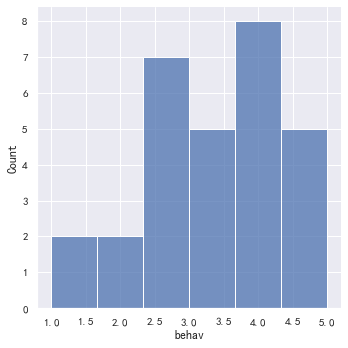

In [178]:
# 直方图
sns.histplot(data=df, x = "behav")

In [179]:
# 类别型变量的描述性统计结果
df.gender.value_counts()

女性    47
男性    10
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

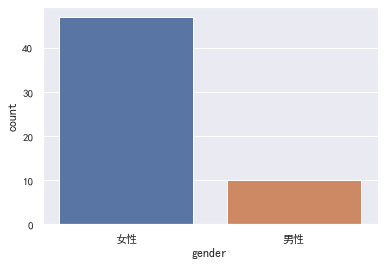

In [180]:
# 条形图
sns.countplot(x="gender", data=df)

In [181]:
# 饼状图
table_school = df.school.value_counts()#将学院变量整理成表格
table_school


文学与传媒学院       31
商学院           10
会计学院           5
公共管理学院         4
电子与计算机工程学院     4
云康医学与健康学院      1
艺术设计与创意产业系     1
音乐系            1
Name: school, dtype: int64

<AxesSubplot:ylabel='school'>

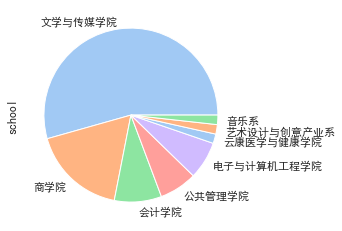

In [182]:
colors = sns.color_palette('pastel')[0:5] #使用seaborn的调色板

table_school.plot.pie(colors = colors)#用matplotlib画图

## 🎉推断性统计

### 1、独立样本t检验

性别（gender） & 行为投入(behav)

In [183]:
# 男女生行为投入的平均值
df.groupby("gender").behav.mean()



gender
女性    3.405797
男性    2.888889
Name: behav, dtype: float64

In [204]:
# 独立样本t检验结果（检验统计量t值，p值）
stats.ttest_ind(
    df_yes["behav"][df_yes["gender"] == "男性"],
    df_yes["behav"][df_yes["gender"] == "女性"],
)



Ttest_indResult(statistic=-1.0722246921722047, pvalue=0.2931097853713329)

<AxesSubplot:xlabel='gender', ylabel='behav'>

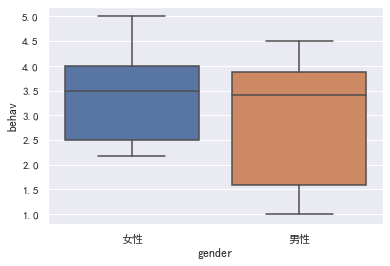

In [185]:
## 独立样本t检验结果可视化
sns.boxplot(x = df["gender"], y = df["behav"]) 

**结果解读：**
男生和女生行为投入分别是3.41和2.89.独立样本t检验显示男生和女生行为投入**没有显著差异**(t=-1.07,p=0.29 > 0.05)。

### 2、单因素方差分析

学院（school） & 行为投入（behav）

In [186]:
df.groupby('school').behav.mean()

school
云康医学与健康学院     4.500000
会计学院          3.500000
公共管理学院        3.333333
商学院           3.700000
文学与传媒学院       3.186275
电子与计算机工程学院    1.000000
艺术设计与创意产业系    4.000000
音乐系                NaN
Name: behav, dtype: float64

In [187]:
# 单因素方差分析
aov = pg.anova(data=df, dv="behav", between="school", detailed=True)
print(aov)


   Source         SS  DF        MS        F     p-unc       np2
0  school   8.283164   6  1.380527  1.32923  0.286206  0.266064
1  Within  22.849020  22  1.038592      NaN       NaN       NaN


In [203]:
#事后检验
posthoc = pairwise_tukeyhsd(df_yes['behav'], df_yes['school'])
print(posthoc)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
 云康医学与健康学院       会计学院     -1.0    0.9 -5.6645 3.6645  False
 云康医学与健康学院     公共管理学院  -1.1667    0.9 -4.9752 2.6419  False
 云康医学与健康学院        商学院     -0.8    0.9 -4.4131 2.8131  False
 云康医学与健康学院    文学与传媒学院  -1.3137 0.8511 -4.7076 2.0802  False
 云康医学与健康学院 电子与计算机工程学院     -3.5 0.2337 -8.1645 1.1645  False
 云康医学与健康学院 艺术设计与创意产业系     -0.5    0.9 -5.1645 4.1645  False
      会计学院     公共管理学院  -0.1667    0.9 -3.9752 3.6419  False
      会计学院        商学院      0.2    0.9 -3.4131 3.8131  False
      会计学院    文学与传媒学院  -0.3137    0.9 -3.7076 3.0802  False
      会计学院 电子与计算机工程学院     -2.5   0.59 -7.1645 2.1645  False
      会计学院 艺术设计与创意产业系      0.5    0.9 -4.1645 5.1645  False
    公共管理学院        商学院   0.3667    0.9 -2.0421 2.7754  False
    公共管理学院    文学与传媒学院  -0.1471    0.9 -2.2125 1.9184  False
    公共管理学院 电子与计算机工程学院  -2.3333 0.4539 -6

<AxesSubplot:xlabel='school', ylabel='behav'>

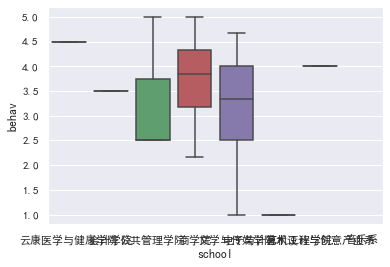

In [189]:
# 单因素方差分析结果可视化
sns.boxplot(x="school", y="behav", data=df)

<AxesSubplot:xlabel='school', ylabel='behav'>

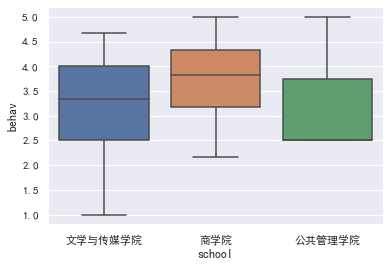

In [190]:
# 筛选"文学与传媒学院","商学院","公共管理学院"这三个学院
sns.boxplot(x = 'school', y = 'behav', data = df, order= ["文学与传媒学院","商学院","公共管理学院"]) 

**结果解读：**
不同学院的学生在行为投入上**没有显著差异**(F = 1.33, p = 0.29 > 0.05)。

### 3、卡方检验

四级成绩(cet4) & 平台使用（usage）

In [191]:
# 列联表
crosstab = pd.crosstab(df.cet4,df.usage)
crosstab


usage,否,是
cet4,,
未通过,13,12
通过了,15,17


In [192]:
# 卡方检验结果（检验统计量卡方值，p值,自由度，期望频数）
stat, p, dof, expected = chi2_contingency(crosstab) 


In [193]:
#卡方值
stat

0.013710360221674767

In [194]:
# p值
print("p = " + str(p))

p = 0.9067877455744078


<AxesSubplot:xlabel='usage', ylabel='count'>

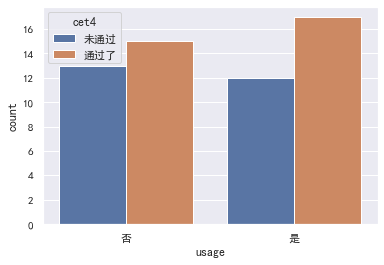

In [24]:
# 卡方检验结果可视化
sns.countplot(x = 'usage', hue = 'cet4', data = df) 

**结果解读：**
卡方检验的结果显示“四级成绩”与“英语学习平台”**没有显著关联**（chisq=0.14,p=0.91 >0.05）。

### 4、相关分析

数字能力（digital_skill） & 行为投入（behav）

In [196]:
# 努力方式与排名的相关关系
pg.pairwise_corr(df, columns=["digital_skill","behav"], method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,digital_skill,behav,pearson,two-sided,29,0.153532,"[-0.23, 0.49]",0.426522,0.312,0.125557


<AxesSubplot:xlabel='digital_skill', ylabel='behav'>

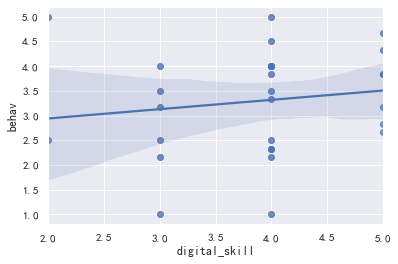

In [197]:
# 散点图（两变量）（包含拟合直线）
sns.regplot(x = "digital_skill", y = "behav", data = df)

**结果解读：**
相关分析的结果显示“数字能力”与“行为投入”**没有显著相关**（r=0.15,p=0.43 > 0.05）。

In [198]:
# 多个变量的相关分析
df[[ "behav","cogn","emo","soc"]].rcorr()

,behav,cogn,emo,soc
behav,-,***,***,***
cogn,0.762,-,***,***
emo,0.826,0.883,-,***
soc,0.765,0.792,0.844,-


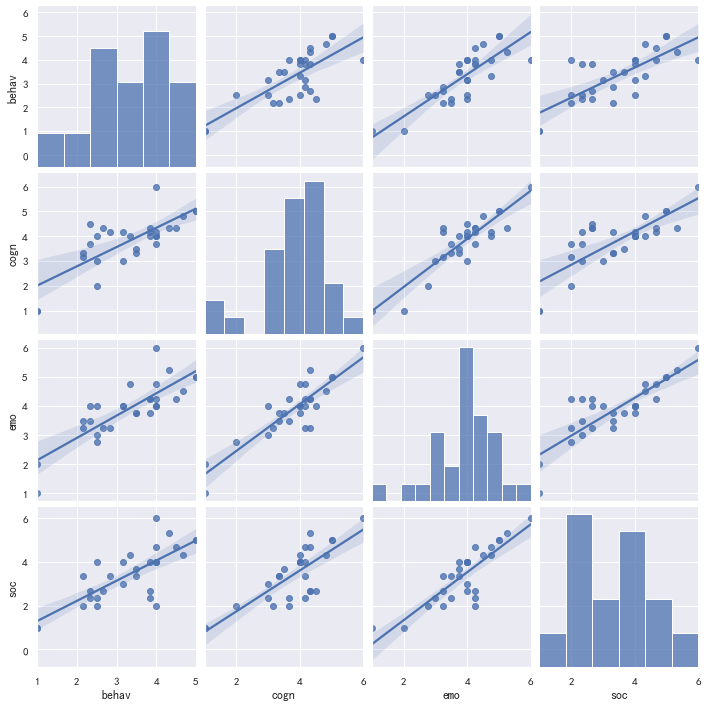

In [199]:
# 筛选多个变量画出散点图（含回归直线）“矩阵”
sns.pairplot(df[["behav","cogn","emo","soc"]], kind="reg")

**结果解读：**
相关分析的结果显示“行为投入”、“认知投入”、“情感投入”和“社会性投入”两两之间显著相关。

### 5、信度分析

In [200]:
df_behav = df.filter(regex = "^behav_.*")#以正则表达式的办法筛选以"behav_"开头的变量
pg.cronbach_alpha(data=df_behav)[0]

0.8372900129222817

In [201]:
df_cogn = df.filter(regex = "^cogn_.*")#以正则表达式的办法筛选以"cogn_"开头的变量
pg.cronbach_alpha(data=df_cogn)[0]

0.9382025136352856

In [23]:
df_emo = df[["emo_1","emo_2","emo_3","emo_4_recode"]]
pg.cronbach_alpha(data=df_emo)[0]

0.6031019577930332

In [22]:
df_soc = df.filter(regex = "^soc_.*")#以正则表达式的办法筛选以"soc_"开头的变量
pg.cronbach_alpha(data=df_soc)[0]

0.9456355283307811

**结果解读：**
“行为投入”、“认知投入”、“情感投入”和“社会性投入”等变量的克隆巴赫系数分别为0.84, 0.94, 0.60, 0.95.“行为投入”、“认知投入”和“社会性投入”的信度水平较高,“情感投入”的信度水平一般般。